In [1]:
!pip install numpy

In [3]:
!pip install pandas

In [5]:
!pip install matplotlib

In [7]:
!pip install seaborn

In [9]:
import numpy as np

In [11]:
import pandas as pd


In [15]:
import matplotlib.pyplot as plt

In [17]:
import seaborn as sns

In [29]:
df = pd.read_csv("kaagledata.csv")

In [37]:
df

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [43]:
df.shape

(30641, 15)

In [47]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [57]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

## DROP UNAMED COLUMN


In [65]:
df = df.drop("Unnamed: 0", axis =1)

In [67]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


## change weekly study hours

In [73]:
df["WklyStudyHours"] = df["WklyStudyHours"].str.replace("05-Oct","5 - 10")

In [83]:
df["WklyStudyHours"].nunique()

3

In [142]:
print(df["WklyStudyHours"].unique())

['< 5' '5 - 10' '> 10' nan]


 ## Gender Distribution

<function matplotlib.pyplot.show(close=None, block=None)>

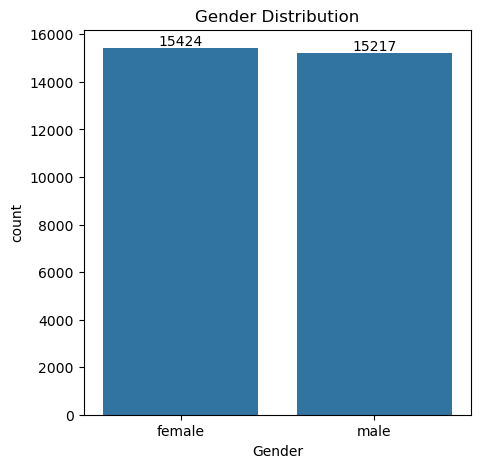

In [117]:
plt.figure(figsize = (5,5))
plt.title("Gender Distribution")
ax = sns.countplot(data= df, x = "Gender")
ax.bar_label(ax.containers[0])
plt.show


### from the above chart we can clealry see that number of girls are more than number of boys

In [99]:
group_by= df.groupby("ParentEduc").agg({"MathScore" :"mean", "ReadingScore" :"mean" , "WritingScore" :"mean" })
group_by

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


<function matplotlib.pyplot.show(close=None, block=None)>

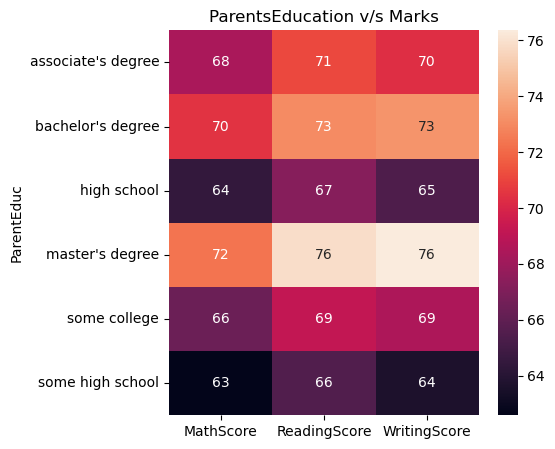

In [119]:
plt.figure(figsize= (5,5))
sns.heatmap(group_by,annot = True)
plt.title("ParentsEducation v/s Marks")
plt.show

 ### we can conclude that the level of parent's qualification had a direct relation with thier marks
 

In [111]:
group_by1= df.groupby("ParentMaritalStatus").agg({"MathScore" :"mean", "ReadingScore" :"mean" , "WritingScore" :"mean" })
group_by1

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.691197,69.655011,68.799146
married,66.657326,69.389575,68.420981
single,66.165704,69.157250,68.174440
widowed,67.368866,69.651438,68.563452


<function matplotlib.pyplot.show(close=None, block=None)>

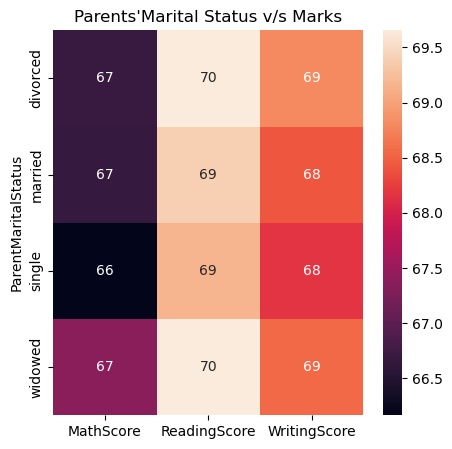

In [121]:
plt.figure(figsize= (5,5))
sns.heatmap(group_by1,annot = True)
plt.title("Parents'Marital Status v/s Marks")
plt.show

#### from the above chart we can conclude that parents' marital status had negligible impact on marks

In [128]:
group_by2= df.groupby("WklyStudyHours").agg({"MathScore" :"mean", "ReadingScore" :"mean" , "WritingScore" :"mean" })
group_by2

,MathScore,ReadingScore,WritingScore
WklyStudyHours,,,
5 - 10,66.870491,69.660532,68.636280
< 5,64.580359,68.176135,67.090192
> 10,68.696655,70.365436,69.777778


<function matplotlib.pyplot.show(close=None, block=None)>

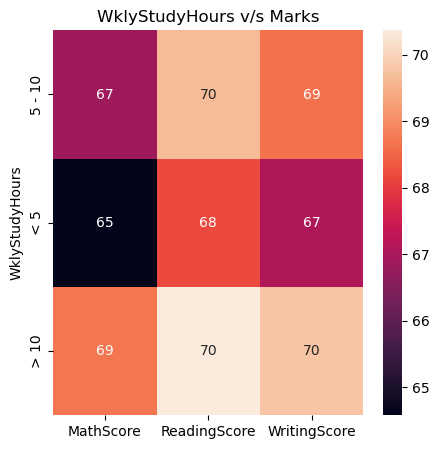

In [130]:
plt.figure(figsize= (5,5))
sns.heatmap(group_by2,annot = True)
plt.title("WklyStudyHours v/s Marks")
plt.show

### from the above heatmap we can conclude that increase in weekly study hours lead to increase in marks

<function matplotlib.pyplot.show(close=None, block=None)>

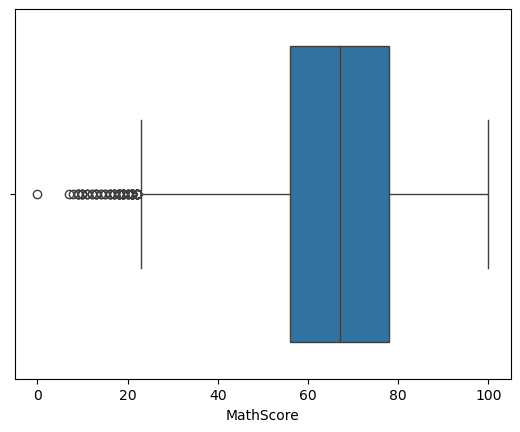

In [136]:
sns.boxplot(data =df , x = "MathScore")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

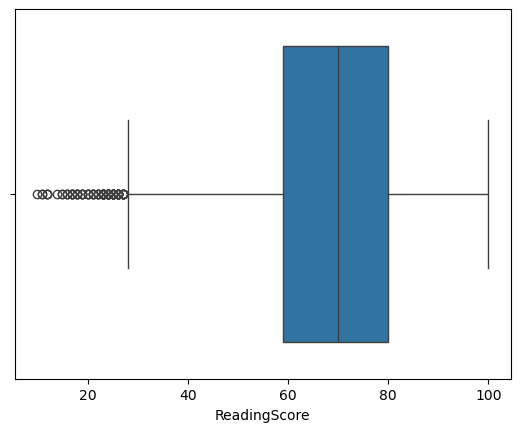

In [138]:
sns.boxplot(data =df , x = "ReadingScore")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

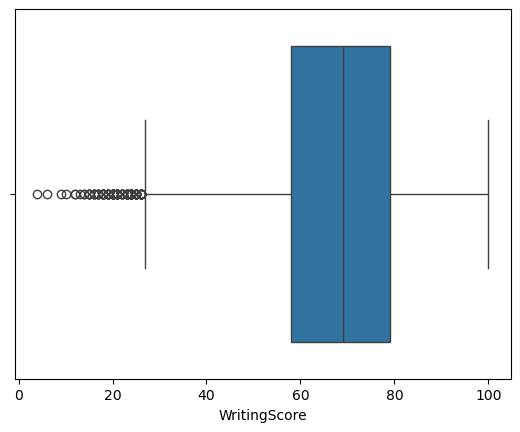

In [140]:
sns.boxplot(data =df , x = "WritingScore")
plt.show

In [144]:
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


### Distribution Of Ethnic Gropus

Text(0.5, 1.0, 'Distribution of Ethics Group')

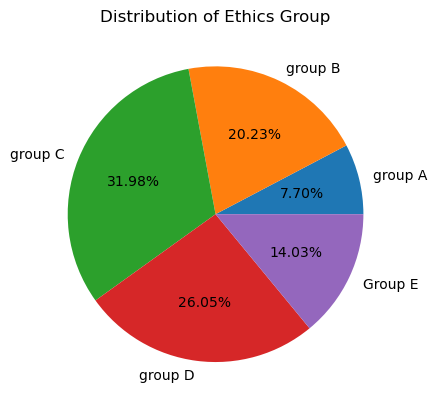

In [185]:
gA= df[df["EthnicGroup"] == "group A"].count()
gB= df[df["EthnicGroup"] == "group B"].count()
gC= df[df["EthnicGroup"] == "group C"].count()
gD= df[df["EthnicGroup"] == "group D"].count()
gE= df[df["EthnicGroup"] == "group E"].count()
ml= [gA["EthnicGroup"],gB["EthnicGroup"],gC["EthnicGroup"],gD["EthnicGroup"],gE["EthnicGroup"]]

l = ["group A", "group B" , "group C", "group D" , "Group E"]

plt.pie(ml,labels = l,autopct = "%1.2f%%")
plt.show
plt.title("Distribution of Ethics Group")

[Text(0, 0, '9212'),
 Text(0, 0, '5826'),
 Text(0, 0, '2219'),
 Text(0, 0, '7503'),
 Text(0, 0, '4041')]

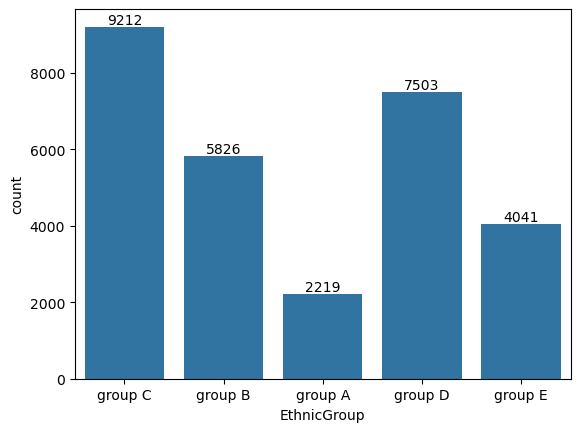

In [191]:
ax= sns.countplot(data = df , x = "EthnicGroup")
ax.bar_label(ax.containers[0])